# Loading Dataset

You can download the dataset from {https://challenge.isic-archive.com/data/#2018}.
The data from **Task 3** will be used in this assignment. You should download all Training, Validation, Test Data and their corresponding ground truth labels. The dataset consists of 10015 skin images from 7 classes. We will extract the images of 7 classes (Melanoma, Melanocytic nevi, Basal cell carcinoma, Actinic keratoses and intraepithelial carcinoma (akaic), Benign keratosis-like lesions, Dermatofibroma\ and Vascular lesions) and save them as .npy file with the following code:


In [ ]:
#Saved in Github
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Replace these paths with the actual paths to your dataset folders
data_folder = "/content/drive/MyDrive/Deep_Learning_Fall23/Assignment/ISIC2018_Task3_Training_Input/"
ground_truth_folder = "/content/drive/MyDrive/Deep_Learning_Fall23/Assignment/ISIC2018_Task3_Training_GroundTruth/"

csv_file_path = os.path.join(ground_truth_folder, "ISIC2018_Task3_Training_GroundTruth.csv")
df = pd.read_csv(csv_file_path)

image_data = []
labels = []

for index, row in df.iterrows():
    image_title = row['image']
    label = row.drop('image', axis=0)  # Drop the 'image' column to keep only labels

    image_path = os.path.join(data_folder, image_title + ".jpg")

    try:
        # Open the image using PIL (or you can use OpenCV) within a 'with' statement
        with Image.open(image_path) as image:
            if image is not None:
                # Resize images
                im = image.resize((120,150), Image.LANCZOS)
                # Append image and label to respective lists
                image_data.append(np.array(im))
                labels.append(label)
            else:
                print(f"Error opening image '{image_path}': NoneType object returned")
    except Exception as e:
        print(f"Error opening image '{image_path}': {e}")

np.save("/content/drive/MyDrive/Deep_Learning_Fall23/Assignment/data.npy",image_matrix)
np.save("/content/drive/MyDrive/Deep_Learning_Fall23/Assignment/labels.npy",tr_labels)




In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Loading all numpy arrays saved in the above code
file_dir = ""
data = np.load(file_dir + "data.npy")
labels = np.load(file_dir + "labels.npy", allow_pickle=True)
class_labels = np.load(file_dir + "labels_name.npy")
image_id = np.load(file_dir + "data_enhanced.npy")


In [ ]:
tr_labels = np.array(labels)
image_matrix = np.array([np.array(img) for img in data])

# Class mapping
class_mapping = {
    tuple([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]): "Melanoma",
    tuple([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]): "Melanocytic nevi",
    tuple([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]): "Basal cell carcinoma",
    tuple([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]): "Acaic",
    tuple([0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]): "Benign keratosis-like lesions",
    tuple([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]): "Dermatofibroma",
    tuple([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]): "Vascular lesions"
}

# Convert float labels to class names
class_labels = [class_mapping[tuple(label)] for label in tr_labels]
np.save("labels_name.npy",class_labels)

Once you save your data, you can load it from your directory.

## Preprocessing

In [ ]:
import tensorflow
from tensorflow import keras
from sklearn.model_selection import train_test_split

#Splitting data set into a 60/20/20 split for training, validation and testing respectively
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.4, stratify = labels, random_state = 42)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size = 0.5, stratify = y_test, random_state = 42)

#Splitting Image data into training, validation and testing using the same random state as the above
#Replicating the Split to have Image Ids stored for all of them
Image_train, Image_test, _, y_test2 = train_test_split(image_id, labels, test_size = 0.4, stratify = labels, random_state = 42)
Image_test, Image_valid, y_test2, y_valid2 = train_test_split(Image_test, y_test2, test_size = 0.5, stratify = y_test2, random_state = 42)

# convert from integers to floats
X_train = np.asarray(X_train).astype('float32')
X_valid = np.asarray(X_valid).astype('float32')
X_test =  np.asarray(X_test).astype('float32')

# normalize to range 0-1
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

#converting the labels from integers to floats
y_train = np.asarray(y_train).astype('float32')
y_valid = np.asarray(y_valid).astype('float32')
y_test = np.asarray(y_test).astype('float32')

# Visualizing Sample images

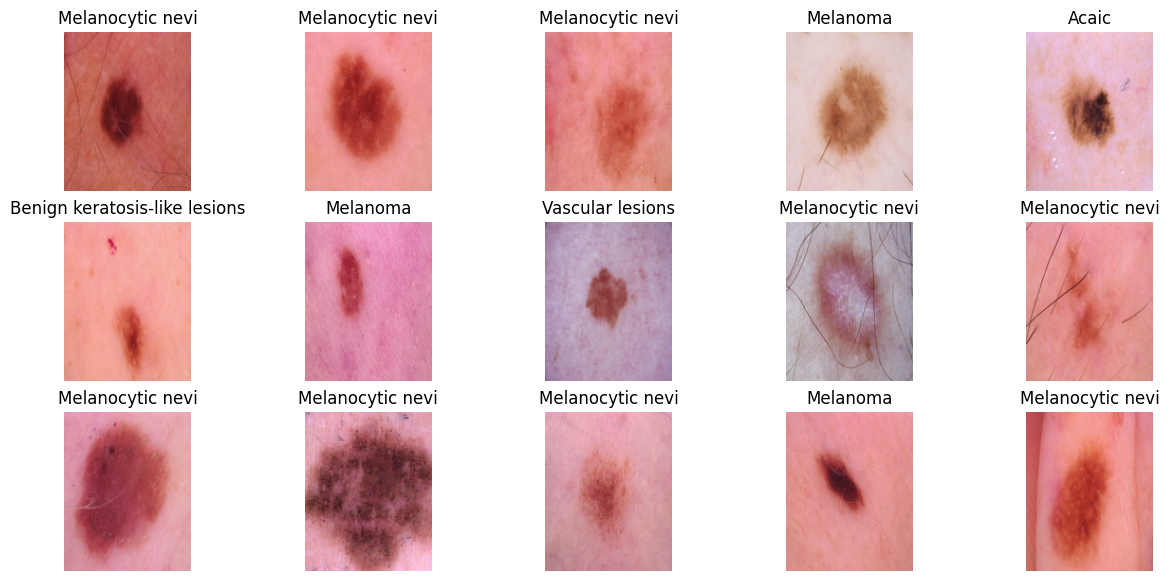

In [ ]:
import random

fig = plt.figure(figsize=(15, 7))

#Finding a random sample image 15 times
for i in range(1,16):
  index = random.randint(0, X_train.shape[0])

  fig.add_subplot(3,5,i)
  plt.imshow(X_train[index], cmap=plt.get_cmap('gray'))
  plt.axis("off")
  #Finding the respective label of the current sample image
  plt.title(class_labels[index])

#Showing our canvas with the 15 sample images and their respective class label
plt.show()


# Visualize Class Label Distribution

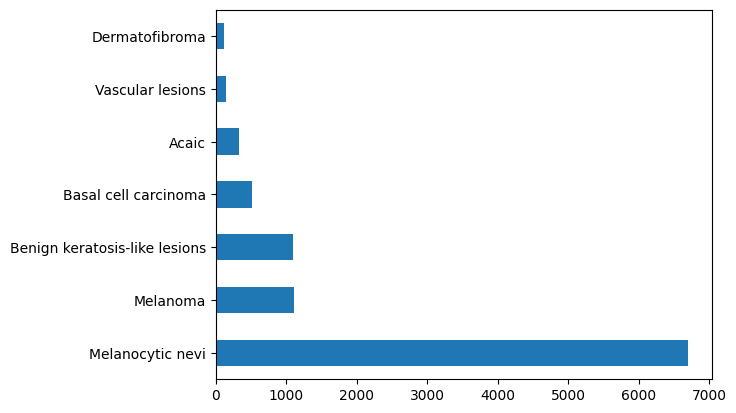

In [ ]:
#Visualizing the Distribution using the original and full class_labels dataset
df = pd.DataFrame(class_labels, columns=['Label'])
ax = df.Label.value_counts().plot(kind='barh')

# Baseline Model

In [ ]:
from keras import Sequential
from keras import layers

#Creating the baseline model as seen in the assignment specifications
def create_baseline_model():
  model = Sequential()
  model.add(layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (150,120,3), padding = 'same'))
  model.add(layers.Conv2D(32, (3,3), activation = 'relu' , padding = 'same'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(64, (3,3), activation = 'relu' , padding = 'same'))
  model.add(layers.Conv2D(32, (3,3), activation = 'relu' , padding = 'same'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(32, activation ='relu'))
  model.add(layers.Dense(7, activation ='softmax'))

  #Using Categorical Crossentropy for the reason that we have more than 2 classes
  model.compile(optimizer='Adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

#Creating a model and outputting the summary of this model
baseline_model = create_baseline_model()
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 120, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 120, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 60, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 60, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 30, 32)       0         
 2D)                                                    

In [ ]:
#Fitting our baseline model with the recently split data for 10 epochs with batches of 32
history = baseline_model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_data = (X_valid,y_valid))
#Saving our Baseline model to be able to Replot graphs
baseline_model.save("Models/Baseline")

Epoch 1/10
188/188 [==============================] - 166s 873ms/step - loss: 1.0683 - accuracy: 0.6660 - val_loss: 0.9646 - val_accuracy: 0.6770
Epoch 2/10
188/188 [==============================] - 164s 870ms/step - loss: 0.9474 - accuracy: 0.6667 - val_loss: 0.9222 - val_accuracy: 0.6705
Epoch 3/10
188/188 [==============================] - 163s 870ms/step - loss: 0.8905 - accuracy: 0.6816 - val_loss: 0.8853 - val_accuracy: 0.6790
Epoch 4/10
188/188 [==============================] - 164s 871ms/step - loss: 0.8616 - accuracy: 0.6896 - val_loss: 0.8586 - val_accuracy: 0.7009
Epoch 5/10
188/188 [==============================] - 164s 871ms/step - loss: 0.8384 - accuracy: 0.6971 - val_loss: 0.8840 - val_accuracy: 0.6815
Epoch 6/10
188/188 [==============================] - 164s 871ms/step - loss: 0.8064 - accuracy: 0.7088 - val_loss: 0.8412 - val_accuracy: 0.6960
Epoch 7/10
188/188 [==============================] - 163s 869ms/step - loss: 0.7726 - accuracy: 0.7261 - val_loss: 0.8296 -

INFO:tensorflow:Assets written to: Models/Baseline\assets


INFO:tensorflow:Assets written to: Models/Baseline\assets


In [ ]:
#Functions plotting loss and accuracy history graphs
def loss_plotting(history):
  plt.title("Training and Validation Losses")
  plt.plot(history.history["loss"], color = 'blue', label = 'Training')
  plt.plot(history.history["val_loss"], color = 'orange', label = 'Validation')
  plt.show()

def accuracy_plotting(history):
  plt.title("Training and Validation Accuracies")
  plt.plot(history.history["accuracy"], color = 'blue', label = 'Training')
  plt.plot(history.history["val_accuracy"], color = 'orange', label = 'Validation')
  plt.show()


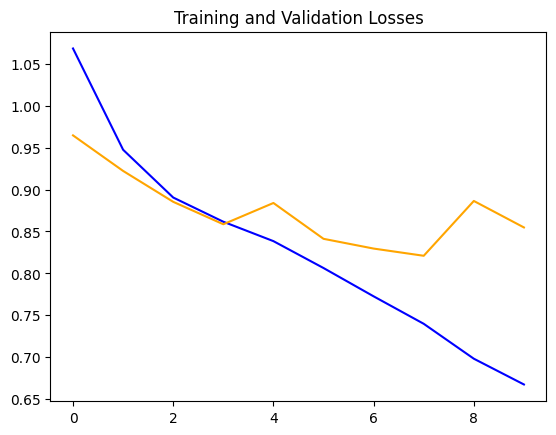

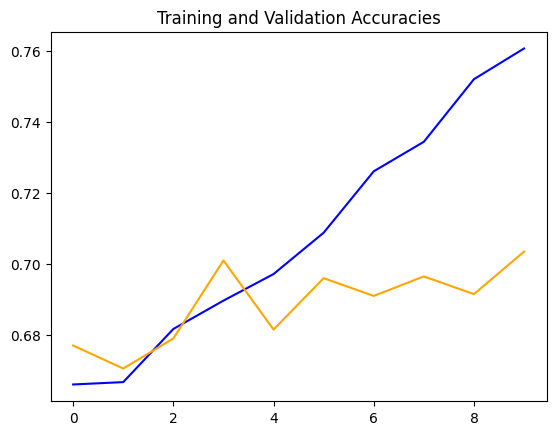

In [ ]:
#Baseline Model Loss and Accuracy Graphs for Training and Validation
loss_plotting(history)
accuracy_plotting(history)

In [ ]:
from sklearn.metrics import roc_curve, auc
#Function for a general ROC Curve
#Using an input data X and output data y
#For a specific model

def ROC_curve(X,y,model):
  score = model.predict(X)
  plt.figure(figsize=(10,8))

  for i in range(y_test.shape[1]):
    fpr, tpr, _ = roc_curve(y[:, i], score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,tpr,label = f'Class {i} (area = {roc_auc: .2f})')

  plt.plot([0,1], [0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0,1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve - All Classes')
  plt.legend(loc='lower right')
  plt.show()
  #Returning the score of the model for confusion matrices
  return score



63/63 [==============================] - 8s 123ms/step


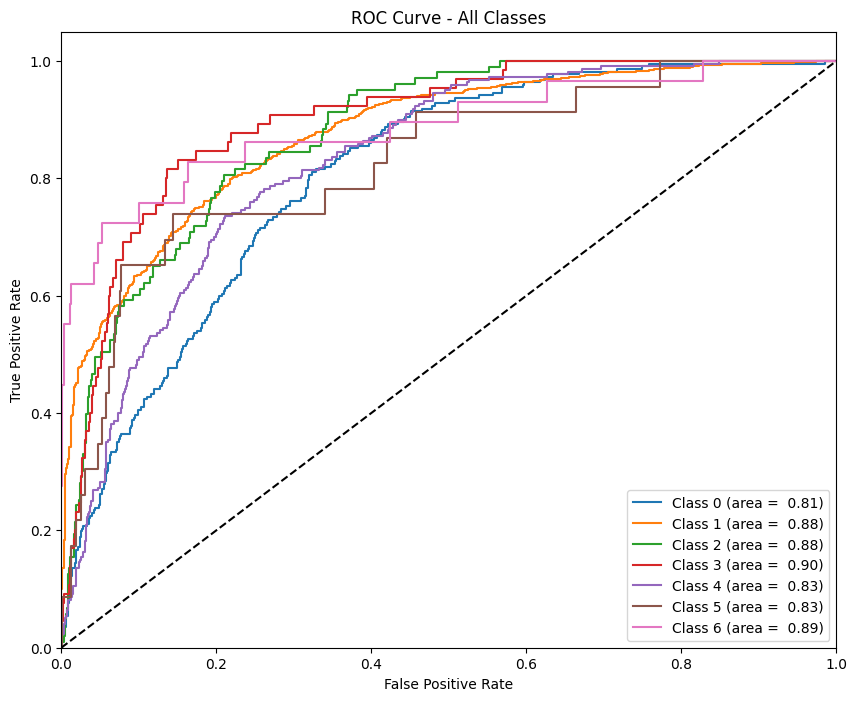

63/63 [==============================] - 8s 122ms/step


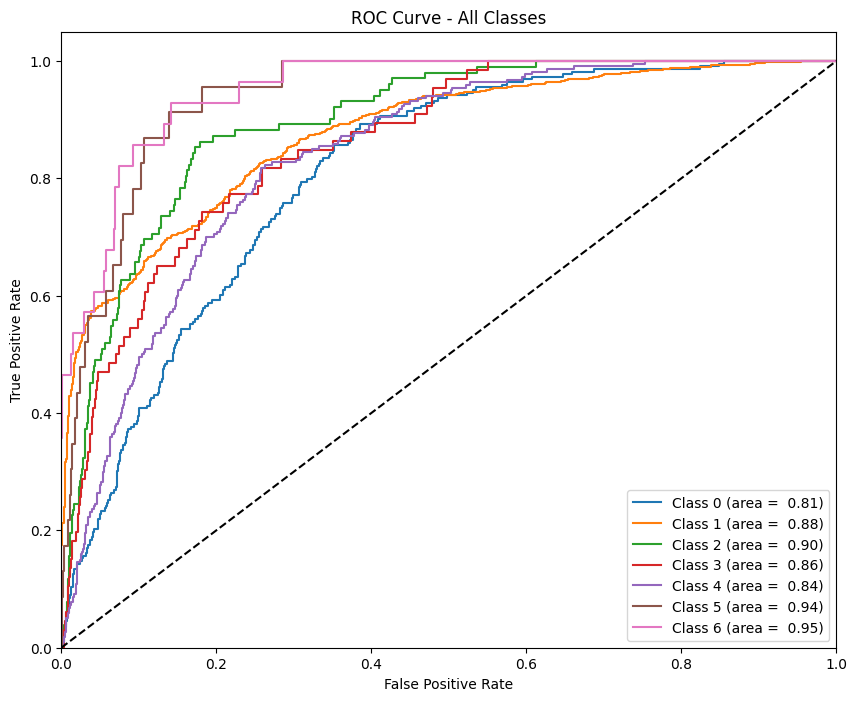

In [ ]:
#Validation and Testing ROC Curves for Baseline model
valid_score = ROC_curve(X_valid,y_valid,baseline_model)
test_score = ROC_curve(X_test,y_test,baseline_model)

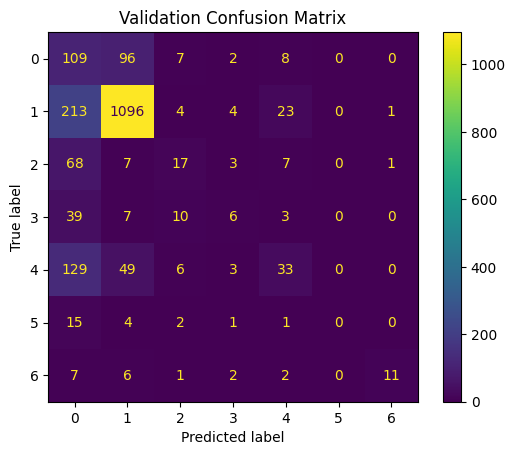

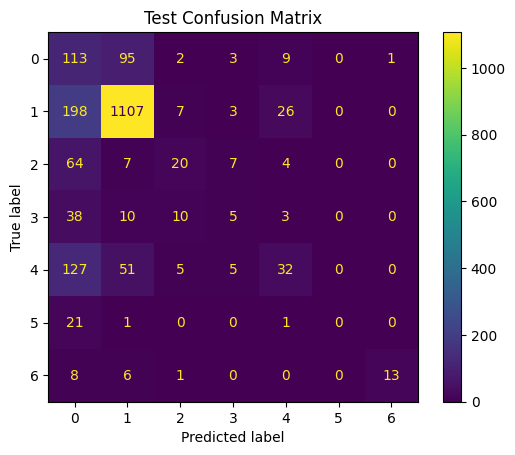

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

#Validation and Testing Confusion Matrices of Baseline Model

y_valid = np.array(y_valid)
valid_score = (valid_score > 0.5)
cm = confusion_matrix(y_valid.argmax(axis=1), valid_score.argmax(axis=1))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.title("Validation Confusion Matrix")
plt.show()

test_score = (test_score > 0.5)
cm = confusion_matrix(y_test.argmax(axis=1), test_score.argmax(axis=1))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.title("Test Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

#Validation and Testing Classification Reports respectively for Baseline Model
print(classification_report(y_valid, valid_score, zero_division=0.0), "\n\n")
print(classification_report(y_test, test_score, zero_division=0.0))

              precision    recall  f1-score   support

           0       0.43      0.23      0.30       222
           1       0.87      0.82      0.84      1341
           2       0.36      0.17      0.23       103
           3       0.29      0.09      0.14        65
           4       0.43      0.15      0.22       220
           5       0.00      0.00      0.00        23
           6       0.85      0.38      0.52        29

   micro avg       0.79      0.61      0.69      2003
   macro avg       0.46      0.26      0.32      2003
weighted avg       0.72      0.61      0.64      2003
 samples avg       0.61      0.61      0.61      2003
 


              precision    recall  f1-score   support

           0       0.38      0.20      0.26       223
           1       0.87      0.83      0.85      1341
           2       0.44      0.20      0.27       102
           3       0.22      0.08      0.11        66
           4       0.43      0.15      0.22       220
           5       0.

# Data Augmentation

In [ ]:
#Lists being created for the Dataframes used for Image Augmentation
majority_train_id = []
minority_train_id = []

majority_val_id = []
minority_val_id = []

majority_test_id = []
minority_test_id = []

majority_train_label = []
minority_train_label = []

majority_val_label= []
minority_val_label= []

majority_test_label = []
minority_test_label = []

smallest_train_id = []
smallest_train_label =[]

#Training data set being saved inside majority and minority lists
#Label saved as string instead of one-hot encoded label
#Id saved in separate list to have id and label in the same index
for i in range(X_train.shape[0]):
  if y_train[i][1] == 1:
      majority_train_id.append(Image_train[i])
      majority_train_label.append("MN")

  elif y_train[i][0]==1:
        minority_train_id.append(Image_train[i])
        minority_train_label.append("M")
  elif y_train[i][4]==1:
        minority_train_id.append(Image_train[i])
        minority_train_label.append("BK")
  else:
      smallest_train_id.append(Image_train[i])

      if (y_train[i][2] == 1.0):
          smallest_train_label.append("BCC")
      elif (y_train[i][3] == 1.0):
          smallest_train_label.append("AC")
      elif(y_train[i][5] == 1.0):
          smallest_train_label.append("DF")
      else:
          smallest_train_label.append("VL")

#Validation data set being saved in majority and minority lists
for j in range(X_valid.shape[0]):
  if y_valid[j][1] == 1:
      majority_val_id.append(Image_valid[j])
      majority_val_label.append("MN")
  else:
      minority_val_id.append(Image_valid[j])

      if(y_valid[j][0] == 1.0):
        minority_val_label.append("M")
      elif(y_valid[j][2] == 1.0):
        minority_val_label.append("BCC")
      elif(y_valid[j][3] == 1.0):
        minority_val_label.append("AC")
      elif(y_valid[j][4] == 1.0):
        minority_val_label.append("BK")
      elif(y_valid[j][5] == 1.0):
        minority_val_label.append("DF")
      else:
        minority_val_label.append("VL")


#Testing data set being saved in majority and minority lists
for x in range(X_test.shape[0]):
  print(x)
  if y_test[x][1] == 1:
      majority_test_id.append(Image_test[x])
      majority_test_label.append("MN")
  else:
        minority_test_id.append(Image_test[x])

        if(y_test[x][0] == 1.0):
          minority_test_label.append("M")
        elif(y_test[x][2] == 1.0):
          minority_test_label.append("BCC")
        elif(y_test[x][3] == 1.0):
          minority_test_label.append("AC")
        elif(y_test[x][4] == 1.0):
          minority_test_label.append("BK")
        elif(y_test[x][5] == 1.0):
          minority_test_label.append("DF")
        else:
          minority_test_label.append("VL")

# print(len(majority_train_id) + len(majority_val_id) + len(majority_test_id))
# print(len(minority_train_id), " ", len(minority_val_id), " ",len(minority_test_id))
# print(len(smallest_train_id))

#All the lists are turned into numpy arrays to be saved in a local directory
majority_train_id = np.array(majority_train_id)
minority_train_id = np.array(minority_train_id)

majority_val_id = np.array(majority_val_id)
minority_val_id = np.array(minority_val_id)

majority_test_id = np.array(majority_test_id)
minority_test_id = np.array(minority_test_id)

majority_train_label = np.array(majority_train_label)
minority_train_label = np.array(minority_train_label)

majority_val_label= np.array(majority_val_label)
minority_val_label= np.array(minority_val_label)

majority_test_label = np.array(majority_test_label)
minority_test_label = np.array(minority_test_label)

smallest_train_id = np.array(smallest_train_id)
smallest_train_label = np.array(smallest_train_label)

#Saving numpy arrays in a local directory to be used repetitively
np.save("Dataframe Data/majority_train_id.npy", majority_train_id)
np.save("Dataframe Data/majority_val_id.npy", majority_val_id)
np.save("Dataframe Data/majority_test_id.npy", majority_test_id)
np.save("Dataframe Data/majority_train_label.npy", majority_train_label)
np.save("Dataframe Data/majority_val_label.npy",majority_val_label)
np.save("Dataframe Data/majority_test_label.npy",majority_test_label)
np.save("Dataframe Data/minority_train_id.npy",minority_train_id)
np.save("Dataframe Data/minority_val_id.npy",minority_val_id)
np.save("Dataframe Data/minority_test_id.npy",minority_test_id)
np.save("Dataframe Data/minority_train_label.npy",minority_train_label)
np.save("Dataframe Data/minority_val_label.npy",minority_val_label)
np.save("Dataframe Data/minority_test_label.npy",minority_test_label)
np.save("Dataframe Data/smallest_train_label.npy",smallest_train_label)
np.save("Dataframe Data/smallest_train_id.npy",smallest_train_id)


In [ ]:
#Loading our minority and majority numpy arrays
minority_train_id = np.load("Dataframe Data/minority_train_id.npy")
minority_val_id = np.load("Dataframe Data/minority_val_id.npy")
minority_test_id = np.load("Dataframe Data/minority_test_id.npy")
minority_train_label = np.load("Dataframe Data/minority_train_label.npy")
minority_val_label = np.load("Dataframe Data/minority_val_label.npy")
minority_test_label = np.load("Dataframe Data/minority_test_label.npy")

majority_train_id = np.load("Dataframe Data/majority_train_id.npy")
majority_val_id = np.load("Dataframe Data/majority_val_id.npy")
majority_test_id = np.load("Dataframe Data/majority_test_id.npy")
majority_train_label = np.load("Dataframe Data/majority_train_label.npy")
majority_val_label = np.load("Dataframe Data/majority_val_label.npy")
majority_test_label = np.load("Dataframe Data/majority_test_label.npy")

smallest_train_id = np.load("Dataframe Data/smallest_train_id.npy")
smallest_train_label = np.load("Dataframe Data/smallest_train_label.npy")

#Editing the strings in the id array to contain image .jpg extension
majority_train_id = [s+".jpg" for s in majority_train_id]
majority_val_id = [s+".jpg" for s in majority_val_id]
majority_test_id = [s+".jpg" for s in majority_test_id]
minority_train_id = [s+".jpg" for s in minority_train_id]
minority_val_id = [s+".jpg" for s in minority_val_id]
minority_test_id = [s+".jpg" for s in minority_test_id]
smallest_train_id = [s+".jpg" for s in smallest_train_id]

# print(len(minority_train_id))
# print(len(minority_train_label))

In [ ]:
#Creating dataframes for Data Augmentation
#Contain Image Id and String Label
minority_data_train = pd.DataFrame({
    'Image':  minority_train_id,
    'Label': [l for l in minority_train_label],
})

minority_data_valid = pd.DataFrame({
    'Image': minority_val_id,
    'Label': [l for l in minority_val_label],
})

minority_data_test = pd.DataFrame({
    'Image': minority_test_id,
    'Label': [l for l in minority_test_label],
})

majority_data_train = pd.DataFrame({
    'Image':  majority_train_id,
    'Label': [l for l in majority_train_label],
})

majority_data_valid = pd.DataFrame({
    'Image': majority_val_id,
    'Label': [l for l in majority_val_label],
})

majority_data_test = pd.DataFrame({
    'Image': majority_test_id,
    'Label': [l for l in majority_test_label],
})

smallest_data_train = pd.DataFrame({
    'Image': smallest_train_id,
    'Label': [l for l in smallest_train_label]
})

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Using ImageDataGenerator class to perform data augmentation
minority_data_gen = ImageDataGenerator(rotation_range=50,
                                       width_shift_range = 0.1,
                                       height_shift_range=0.1,
                                       horizontal_flip = True,
                                       vertical_flip = True,
                                       brightness_range = (0.9,1.1),
                                       zoom_range = 0.1,
                                       fill_mode = 'nearest')

majority_data_gen = ImageDataGenerator()

class_names = ['M', 'MN', 'BCC', 'AC','BK', 'DF', "VL"]

#Functions for Minority and Majority data augmentation
def MinorityImageAugmentation(data):
    output = minority_data_gen.flow_from_dataframe(
        dataframe= data,
        directory="ISIC2018_Task3_Training_Input/",
        save_to_dir="Augmented Images/",
        x_col='Image',
        y_col="Label",
        target_size=(150,120),
        class_mode='categorical',
        classes = class_names,
        batch_size=32,
        shuffle = False
    )
    return output

def MajorityImageAugmentation(data):
    output = majority_data_gen.flow_from_dataframe(
        dataframe= data,
        directory="ISIC2018_Task3_Training_Input/",
        x_col='Image',
        y_col="Label",
        target_size=(150,120),
        class_mode='categorical',
        classes = class_names,
        batch_size=32,
        shuffle = False
    )
    return output

#Creating data generators for augmentation
minority_train_data = MinorityImageAugmentation(minority_data_train)
minority_val_data = MinorityImageAugmentation(minority_data_valid)
minority_test_data = MinorityImageAugmentation(minority_data_test)
majority_train_data = MajorityImageAugmentation(majority_data_train)
majority_val_data = MajorityImageAugmentation(majority_data_valid)
majority_test_data = MajorityImageAugmentation(majority_data_test)

smallest_train_data = MinorityImageAugmentation(smallest_data_train)

In [ ]:
i = 1
j = 1
count = 0

train_augmented_data = []
train_augmented_labels = []

#Running minority and smallest train data generators
#Using Value estimates for length of performance
#All data generated saved into lists
while count == 0:

  for batch_x, batch_y in minority_train_data:
      train_augmented_data.extend(batch_x)
      train_augmented_labels.extend(tuple(batch_y))
      i+=1
      if i > 100:
        break

  for batch_x_small, batch_y_small in smallest_train_data:
      train_augmented_data.extend(batch_x_small)
      train_augmented_labels.extend(tuple(batch_y_small))
      j+=1
      if j > 300:
        break

  count +=1


In [ ]:
element_counts = {}

#Frequencies of labels including only augmented images printed
for item in train_augmented_labels:
  if tuple(item) in element_counts:
    element_counts[tuple(item)] += 1
  else:
    element_counts[tuple(item)] = 1

for element,count in element_counts.items():
  print(f"{element}:  {count}")

train_augmented_data = np.array(train_augmented_data)
train_augmented_labels = np.array(train_augmented_labels)

print(len(train_augmented_data))

#Saving Augmented Data and Labels numpy arrays
#So that this process does not need to be repeated
np.save("Augmented Arrays/train_augmented_data.npy", train_augmented_data)
np.save("Augmented Arrays/train_augmented_labels.npy",train_augmented_labels)

In [ ]:
#Augmented data and labels loaded
train_augmented_data = np.load("Augmented Arrays/train_augmented_data.npy")
train_augmented_labels = np.load("Augmented Arrays/train_augmented_labels.npy")

#Original Data set split again and augmented data is added to training data set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.6, stratify = labels, random_state = 42)
final_X_test,final_X_val,final_y_test,final_y_val = train_test_split(X_test, y_test, test_size = 0.5, stratify = y_test, random_state = 42)

final_data = np.concatenate((X_train,train_augmented_data))
final_labels = np.concatenate((y_train,train_augmented_labels))

In [ ]:
# convert from integers to floats
final_data = np.array(final_data).astype('float16')
final_X_val = np.array(final_X_val).astype('float16')
final_X_test =  np.array(final_X_test).astype('float16')

# normalize to range 0-1
final_data = final_data / 255.0
final_X_val = final_X_val / 255.0
final_X_test = final_X_test / 255.0

# Converting label data to floats from integers
final_labels = np.asarray(final_labels).astype('float16')
final_y_val = np.asarray(final_y_val).astype('float16')
final_y_test = np.asarray(final_y_test).astype('float16')

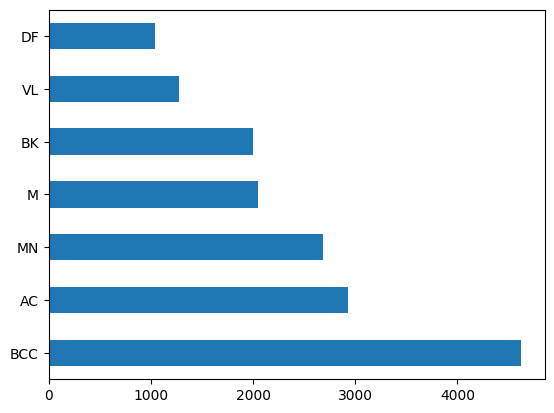

In [ ]:
#adding all the labels into one array for final distribution
label_check = np.concatenate((final_labels,final_y_val))
final_check = np.concatenate((label_check,final_y_test))

#Visualizing the distribution of the data after the data augmentation
string_labels = []
class_names = ['M', 'MN', 'BCC', 'AC','BK', 'DF', "VL"]

for lab in final_labels:
    if(lab[0] == 1):
        string_labels.append("M")
    elif(lab[1] == 1):
        string_labels.append("MN")
    elif(lab[2] == 1):
        string_labels.append("BCC")
    elif(lab[3] == 1):
        string_labels.append("AC")
    elif(lab[4] == 1):
        string_labels.append("BK")
    elif(lab[5] == 1):
        string_labels.append("DF")
    else:
        string_labels.append("VL")

string_labels = np.array(string_labels)

df = pd.DataFrame(string_labels, columns=['Label'])
ax = df.Label.value_counts().plot(kind='barh')

## Enhanced Model

In [ ]:
from keras.layers import LeakyReLU
from tensorflow.keras import regularizers
from keras.initializers import he_normal
from keras.layers import Dropout

def create_enhanced_model_new():
  model = Sequential()
  model.add(layers.Conv2D(64, (3,3), input_shape = (150,120,3), padding = 'same', kernel_regularizer= regularizers.L2(l2 = 0.001), kernel_initializer= 'he_normal'))
  model.add(LeakyReLU(alpha = 0.03))
  model.add(layers.Dropout(0.3))
  model.add(layers.Conv2D(32, (3,3), padding = 'same', kernel_regularizer= regularizers.L2(l2 = 0.001),kernel_initializer= 'he_normal'))
  model.add(LeakyReLU(alpha = 0.03))
  model.add(layers.Dropout(0.3))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(64, (3,3), padding = 'same', kernel_regularizer= regularizers.L2(l2 = 0.001),kernel_initializer= 'he_normal'))
  model.add(LeakyReLU(alpha = 0.03))
  model.add(layers.Dropout(0.3))
  model.add(layers.Conv2D(32, (3,3), padding = 'same', kernel_regularizer= regularizers.L2(l2 = 0.001),kernel_initializer= 'he_normal'))
  model.add(LeakyReLU(alpha = 0.03))
  model.add(layers.Dropout(0.3))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(32, kernel_regularizer= regularizers.L2(l2 = 0.001),kernel_initializer= 'he_normal', activation='relu'))
  model.add(layers.Dense(32, kernel_regularizer= regularizers.L2(l2 = 0.001),kernel_initializer= 'he_normal', activation='relu'))
  model.add(layers.Dense(7, activation ='softmax'))


  model.compile(optimizer='Adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
from keras import callbacks as cb
final_model = create_enhanced_model_new()

In [ ]:
#Fitting the final model into the final augmented data set
final_history = final_model.fit(final_data, final_labels, epochs = 10, batch_size = 128, validation_data=(final_X_val, final_y_val))

Epoch 1/10
130/130 [==============================] - 647s 5s/step - loss: 3.3869 - accuracy: 0.2913 - val_loss: 6.0016 - val_accuracy: 0.2270
Epoch 2/10
130/130 [==============================] - 640s 5s/step - loss: 1.9487 - accuracy: 0.4465 - val_loss: 4.5771 - val_accuracy: 0.1807
Epoch 3/10
130/130 [==============================] - 640s 5s/step - loss: 1.7760 - accuracy: 0.5057 - val_loss: 2.5716 - val_accuracy: 0.4326
Epoch 4/10
130/130 [==============================] - 640s 5s/step - loss: 1.6479 - accuracy: 0.5454 - val_loss: 2.1302 - val_accuracy: 0.4948
Epoch 5/10
130/130 [==============================] - 640s 5s/step - loss: 1.5728 - accuracy: 0.5708 - val_loss: 2.0112 - val_accuracy: 0.5208
Epoch 6/10
130/130 [==============================] - 637s 5s/step - loss: 1.5023 - accuracy: 0.5885 - val_loss: 1.7678 - val_accuracy: 0.5684
Epoch 7/10
130/130 [==============================] - 625s 5s/step - loss: 1.4284 - accuracy: 0.6186 - val_loss: 2.1764 - val_accuracy: 0.5185

In [ ]:
#Saving our model
final_model.save("Models/Enhanced")

INFO:tensorflow:Assets written to: Models/Enhanced\assets


INFO:tensorflow:Assets written to: Models/Enhanced\assets


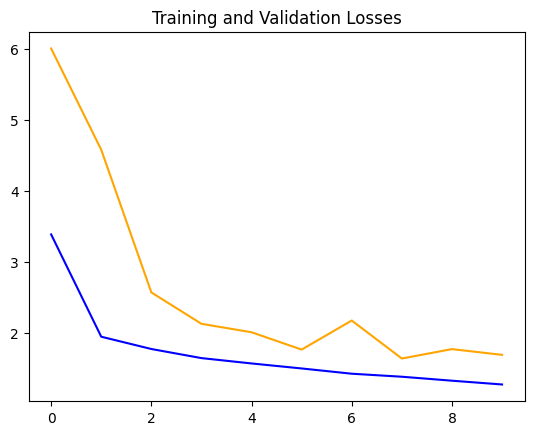

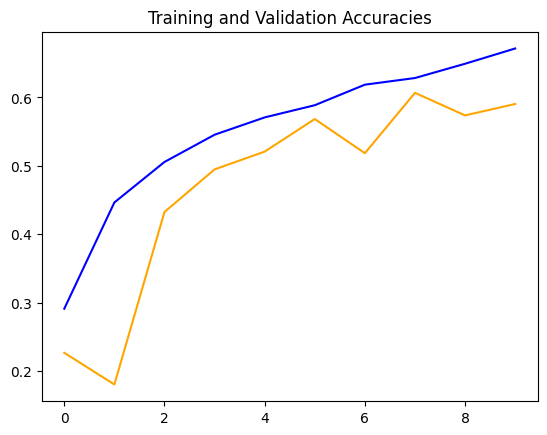

In [ ]:
#Plotting loss and accuracy graphs
loss_plotting(final_history)
accuracy_plotting(final_history)

94/94 [==============================] - 20s 133ms/step


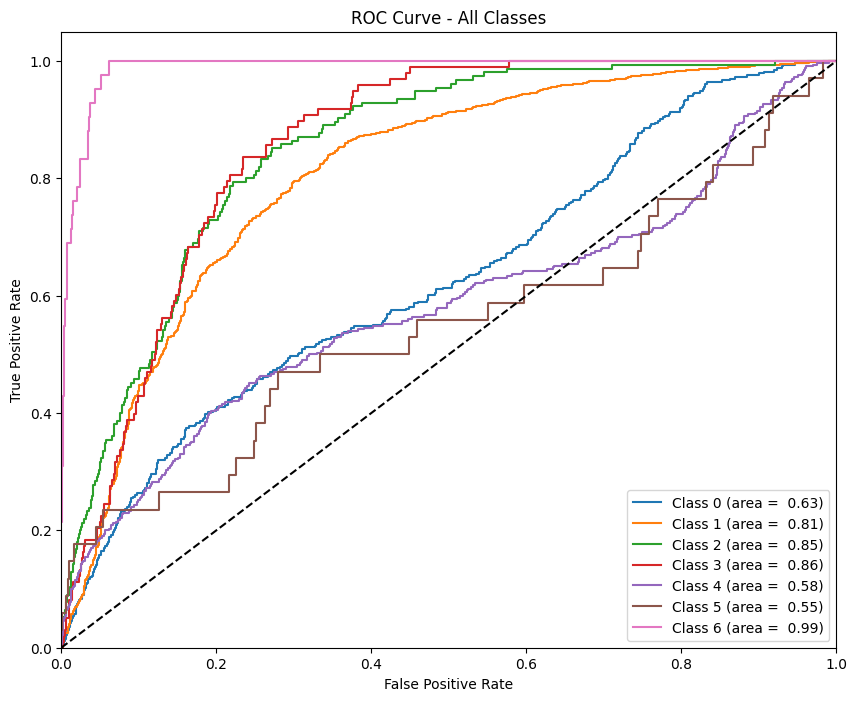

94/94 [==============================] - 13s 133ms/step


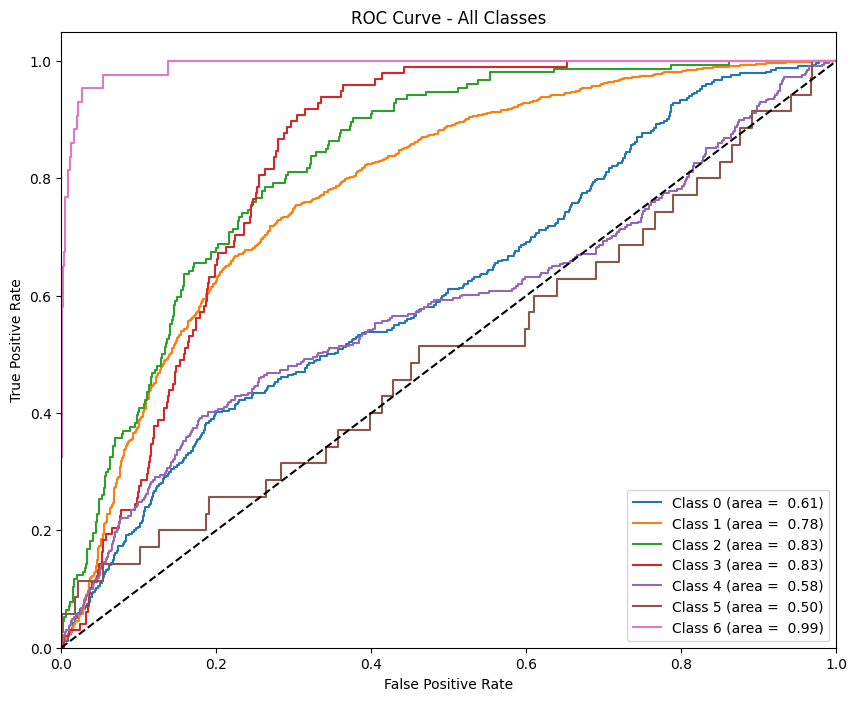

In [ ]:
#Plotting Validation and Testing ROC curves for Enhanced Model
valid_score2 = ROC_curve(final_X_val,final_y_val, final_model)
test_score2 = ROC_curve(final_X_test,final_y_test, final_model)

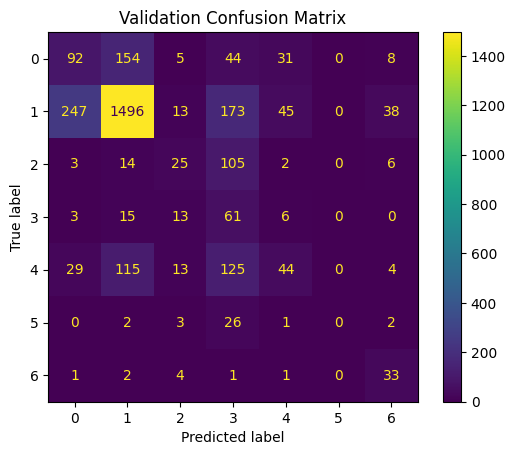

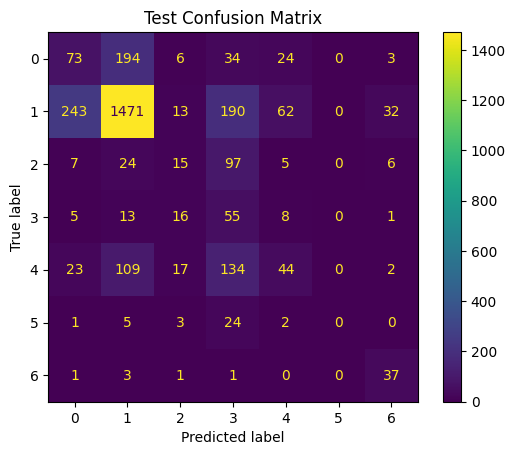

In [ ]:
#Plotting Validation and Testing Confusion Matrices

final_y_val = np.array(final_y_val)
valid_score2 = (valid_score2 > 0.3)
cm = confusion_matrix(final_y_val.argmax(axis=1), valid_score2.argmax(axis=1))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.title("Validation Confusion Matrix")
plt.show()

test_score2 = (test_score2 > 0.3)
cm = confusion_matrix(final_y_test.argmax(axis=1), test_score2.argmax(axis=1))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.title("Test Confusion Matrix")
plt.show()

In [ ]:
#Printing Validation and Testing Classification Reports
print(classification_report(final_y_val, valid_score2, zero_division=0.0), "\n\n")
print(classification_report(final_y_test, test_score2, zero_division=0.0))

              precision    recall  f1-score   support

           0       0.25      0.26      0.26       334
           1       0.83      0.82      0.83      2012
           2       0.32      0.16      0.21       155
           3       0.11      0.81      0.19        98
           4       0.24      0.25      0.24       330
           5       1.00      0.03      0.06        34
           6       0.32      0.81      0.46        42

   micro avg       0.54      0.65      0.59      3005
   macro avg       0.44      0.45      0.32      3005
weighted avg       0.65      0.65      0.63      3005
 samples avg       0.57      0.65      0.60      3005
 


              precision    recall  f1-score   support

           0       0.21      0.20      0.21       334
           1       0.81      0.80      0.81      2011
           2       0.23      0.12      0.16       154
           3       0.09      0.70      0.16        98
           4       0.23      0.27      0.25       329
           5       0.

## Transfer Learning Model

In [ ]:
import tensorflow
from tensorflow import keras
from keras.applications import ResNet50

#our model
resnet_model = Sequential()
#resnet summary, can be removed later
resnet = ResNet50()
resnet.summary()
#pretrained
resnet_pretrained = ResNet50(include_top=False, input_shape=(150,120,3), pooling = 'max', weights = 'imagenet')

for layer in resnet_pretrained.layers:
    layer.trainable = False

#with the top removed from resnet, we need to flatten the layers and add dense layers
resnet_model.add(resnet_pretrained)
resnet_model.add(keras.layers.Flatten())
resnet_model.add(keras.layers.Dense(64, activation = 'relu'))
resnet_model.add(keras.layers.Dense(7, activation = 'softmax'))

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
#Looking at the summary of the added layers
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                131136    
                                                                 
 dense_4 (Dense)             (None, 7)                 455       
                                                                 
Total params: 23,719,303
Trainable params: 131,591
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
#Compiling the Resnet model
resnet_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#Fitting Resnet50 model with training and validation data
history_resnet = resnet_model.fit(X_train,y_train, epochs = 10, batch_size = 64, validation_data=(X_valid, y_valid))

Epoch 1/10
94/94 [==============================] - 113s 1s/step - loss: 1.1980 - accuracy: 0.6635 - val_loss: 1.1716 - val_accuracy: 0.6695
Epoch 2/10
94/94 [==============================] - 108s 1s/step - loss: 1.1055 - accuracy: 0.6710 - val_loss: 1.0869 - val_accuracy: 0.6700
Epoch 3/10
94/94 [==============================] - 105s 1s/step - loss: 1.0871 - accuracy: 0.6705 - val_loss: 1.0626 - val_accuracy: 0.6705
Epoch 4/10
94/94 [==============================] - 104s 1s/step - loss: 1.0676 - accuracy: 0.6700 - val_loss: 1.0521 - val_accuracy: 0.6715
Epoch 5/10
94/94 [==============================] - 110s 1s/step - loss: 1.0687 - accuracy: 0.6750 - val_loss: 1.0463 - val_accuracy: 0.6755
Epoch 6/10
94/94 [==============================] - 109s 1s/step - loss: 1.0382 - accuracy: 0.6737 - val_loss: 1.0430 - val_accuracy: 0.6720
Epoch 7/10
94/94 [==============================] - 108s 1s/step - loss: 1.0293 - accuracy: 0.6773 - val_loss: 1.0089 - val_accuracy: 0.6785
Epoch 8/10
94

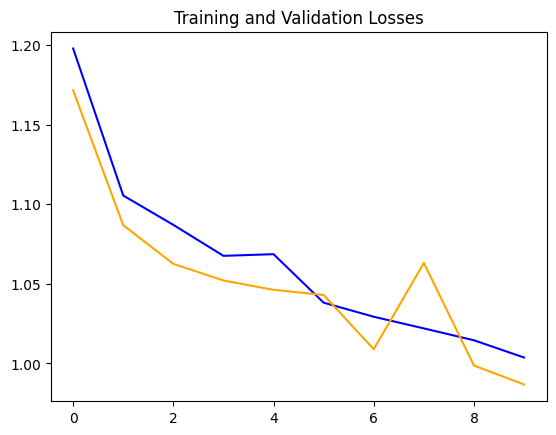

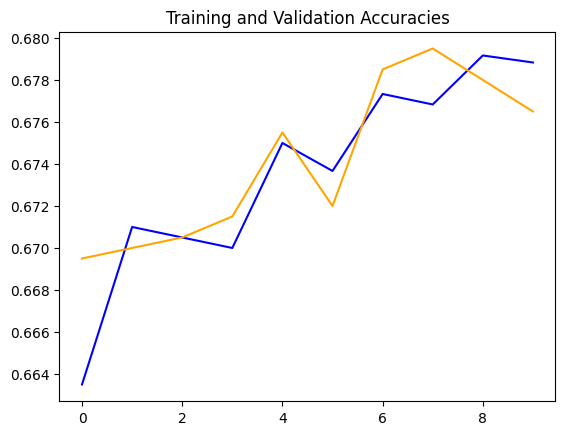

In [ ]:
#Plotting Loss and Accuracy Resnet Graphs
loss_plotting(history_resnet)
accuracy_plotting(history_resnet)

63/63 [==============================] - 28s 436ms/step


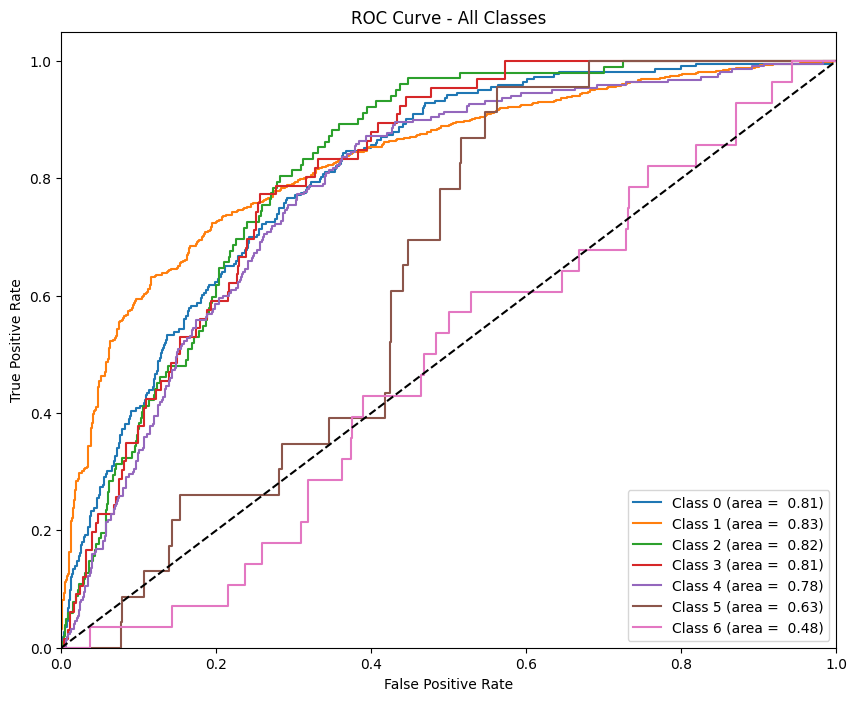

In [ ]:
#Plotting ROC Curve for Resnet
test_score_resnet = ROC_curve(X_test,y_test, resnet_model)

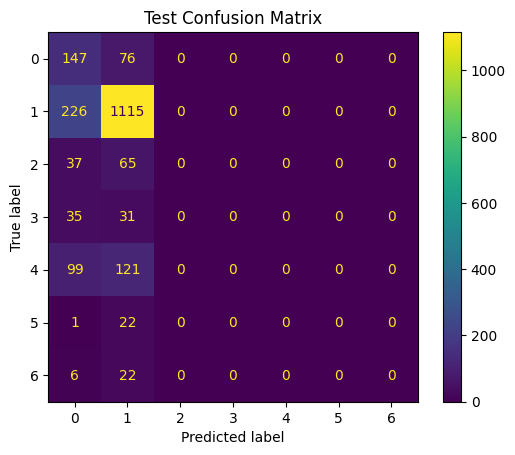

0.5297054418372441


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

#Printing Resnet Confusion Matrix and Accuracy score

test_score_resnet = (test_score_resnet > 0.1)
cm = confusion_matrix(y_test.argmax(axis=1), test_score_resnet.argmax(axis=1))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.title("Test Confusion Matrix")
plt.show()

print(accuracy_score(y_test,test_score_resnet))

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

#Printing the resnet classification report
print(classification_report(y_test, test_score_resnet, zero_division=0.0))

              precision    recall  f1-score   support

           0       0.27      0.66      0.38       223
           1       0.67      1.00      0.80      1341
           2       0.19      0.11      0.14       102
           3       0.12      0.11      0.11        66
           4       0.26      0.60      0.36       220
           5       0.00      0.00      0.00        23
           6       0.00      0.00      0.00        28

   micro avg       0.52      0.82      0.63      2003
   macro avg       0.21      0.35      0.26      2003
weighted avg       0.52      0.82      0.63      2003
 samples avg       0.65      0.82      0.69      2003

